## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [165]:
%matplotlib inline

In [166]:
path = r'D:\alessia\Achievement 6 - Alessia\02 Data'

In [167]:
df = pd.read_csv(os.path.join(path, 'apr20_rent_33_col.csv'))

In [168]:
df.shape

(83273, 34)

In [169]:
df.head()

,Unnamed: 0,obj_regio1,obj_heatingType,obj_cId,obj_newlyConst,obj_pricetrend,obj_yearConstructed,obj_pricetrendbuy,obj_firingTypes,obj_ExclusiveExpose,...,obj_telekomInternetProductAvailable,obj_barrierFree,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2,obj_telekomTvOffer,obj_telekomUploadSpeed,obj_telekomDownloadSpeed,obj_totalRent
0,0,Nordrhein_Westfalen,floor_heating,18611189,y,3.68,2019.0,9.79,district_heating,False,...,True,y,Innenstadt,aed0c058-e395-4d65-84b3-85f94a21bd5f,3,Bielefeld,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,887.0
1,1,Nordrhein_Westfalen,central_heating,18630986,n,3.12,2002.0,6.87,oil,False,...,True,n,Espelkamp,5fe224ee-998b-4edd-be00-805fecd853e7,3,Minden_Lübbecke_Kreis,ONE_YEAR_FREE,"2,4 MBit/s",16 MBit/s,690.0
2,2,Bayern,central_heating,18593341,n,4.73,2015.0,4.54,gas:oil,False,...,True,n,Egling,FALC-MG-11509,7,Bad_Tölz_Wolfratshausen_Kreis,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,1885.0
3,3,Nordrhein_Westfalen,gas_heating,4280742,n,NaN,1964.0,NaN,gas,NaN,...,NaN,n,Vingst,89f6f705-cc82-45d6-96a9-b429992cc47a,3,Köln,NaN,NaN,NaN,940.0
4,4,Nordrhein_Westfalen,central_heating,5212713,n,1.47,1855.0,7.72,gas,False,...,True,n,Buchholz,3255a794-67ac-4400-aeca-a674e4ac2cad,3,Dortmund,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,700.0


**remove columns I am not interested in (or that are categorical)**

In [170]:
df=df.drop(['Unnamed: 0', 'obj_zipCode','obj_regio1', 'obj_heatingType', 'obj_cId', 'obj_newlyConst', 'obj_pricetrend', 'obj_pricetrendbuy', 'obj_firingTypes', 'obj_ExclusiveExpose', 'obj_telekomInternetProductAvailable', 'obj_barrierFree','obj_regio3', 'obj_objectnumber', 'obj_livingSpaceRange','obj_regio2', 'obj_telekomTvOffer', 'obj_telekomUploadSpeed', 'obj_telekomDownloadSpeed', 'geo_bln','obj_cellar','obj_houseNumber','geo_krs','obj_condition','obj_street','obj_streetPlain','geo_plz','geo_land', 'ga_cd_via', 'obj_immotype'], axis = 1)

In [171]:
df

,obj_yearConstructed,obj_livingSpace,obj_noRooms,obj_totalRent
0,2019.0,62.00,2.0,887.0
1,2002.0,70.00,2.0,690.0
2,2015.0,152.00,2.0,1885.0
3,1964.0,78.00,3.0,940.0
4,1855.0,75.00,3.0,700.0
...,...,...,...,...
83268,1983.0,65.00,2.0,780.0
83269,1900.0,48.00,2.0,300.0
83270,1990.0,57.00,3.0,416.0
83271,2006.0,65.00,3.0,410.0


**removing all NaNs**

In [172]:
df = df.dropna()

In [173]:
df.isnull().values.any()

False

**removing outliars**

In [174]:
df.drop(df[df['obj_noRooms'] >= 15].index, inplace = True)

C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_716\592867657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['obj_noRooms'] >= 15].index, inplace = True)


In [175]:
df.drop(df[df['obj_yearConstructed'] <= 1500].index, inplace = True)

C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_716\1463373803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['obj_yearConstructed'] <= 1500].index, inplace = True)


In [176]:
df.drop(df[df['obj_livingSpace'] >= 500].index, inplace = True)

C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_716\2194681568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['obj_livingSpace'] >= 500].index, inplace = True)


In [177]:
df.drop(df[df['obj_noRooms'] >= 30].index, inplace = True)

C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_716\3650661372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['obj_noRooms'] >= 30].index, inplace = True)


### 2. The elbow technique

**Defines the range of potential clusters in the data + Defines k-means clusters in the range assigned above.**

In [178]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

**Creates a score that represents a rate of variation for the given cluster option.**

In [179]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

[-18214402747.500233,
 -7869438000.692454,
 -4534559741.925169,
 -2978692949.011893,
 -2097963111.4995093,
 -1610358266.646347,
 -1247179662.3557365,
 -989019332.9325038,
 -826956029.9618917]

**Plotting the elbow curve**

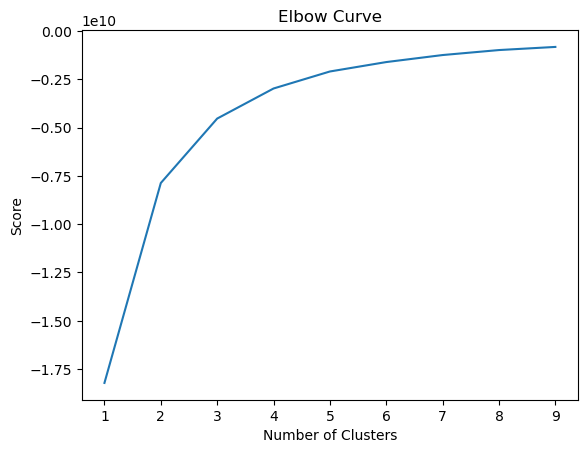

In [180]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In the elbow curve, we can see that the curve flattens out after reaching the cluster 4. Therefore, the right number of clusters for the analysis is 4.

### 3. k-means clustering

**Creating the k-means object**

In [181]:
kmeans = KMeans(n_clusters =4) 


**# adapt the k-means object to the data**

In [182]:
kmeans.fit(df)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [183]:
df['clusters'] = kmeans.fit_predict(df)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_716\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [184]:
df.head()

,obj_yearConstructed,obj_livingSpace,obj_noRooms,obj_totalRent,clusters
0,2019.0,62.0,2.0,887.0,0
1,2002.0,70.0,2.0,690.0,1
2,2015.0,152.0,2.0,1885.0,2
3,1964.0,78.0,3.0,940.0,0
4,1855.0,75.0,3.0,700.0,1


In [185]:
df['clusters'].value_counts()

1    32977
0    16181
2     5611
3      618
Name: clusters, dtype: int64

**correspondence betwee cluster number and color**

In [186]:
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_716\518317754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 3, 'cluster'] = 'black'


In [187]:
df.groupby('cluster').agg({'obj_yearConstructed':['mean', 'median', 'min', 'max'], 
                         'obj_livingSpace':['mean', 'median', 'min', 'max'], 
                         'obj_noRooms':['mean', 'median' , 'min', 'max'],
                          'obj_totalRent':['mean', 'median', 'min' , 'max']})

obj_yearConstructed                         obj_livingSpace  \
                           mean  median     min     max            mean   
cluster                                                                   
black               1984.292880  2011.0  1800.0  2020.0      173.964482   
dark purple         1987.431652  2013.0  1513.0  2021.0      113.043869   
pink                1978.769174  1990.0  1503.0  2021.0       83.732369   
purple              1958.064469  1966.0  1514.0  2080.0       56.909344   

                                 obj_noRooms                   obj_totalRent  \
             median   min    max        mean median  min   max          mean   
cluster                                                                        
black        160.00  51.0  480.0    4.122168    4.0  1.0  13.0   3822.857961   
dark purple  110.00   0.0  334.0    3.437444    3.0  1.0  12.0   1819.892616   
pink          82.00   0.0  250.0    2.859879    3.0  1.0   9.0   1027.522489   
purple        57.74   0.0  480.0    2.270446    2.0  1.0  12.0    502.230499   

                                       
              median     min      max  
cluster                                
black        3400.00  2823.0  15500.0  
dark purple  1723.44  1422.5   2820.0  
pink          990.50   763.0   1426.0  
purple        494.00     0.0    775.0

**Plotting the clusters for "obj_totalRent" and "obj_yearConstructed"**

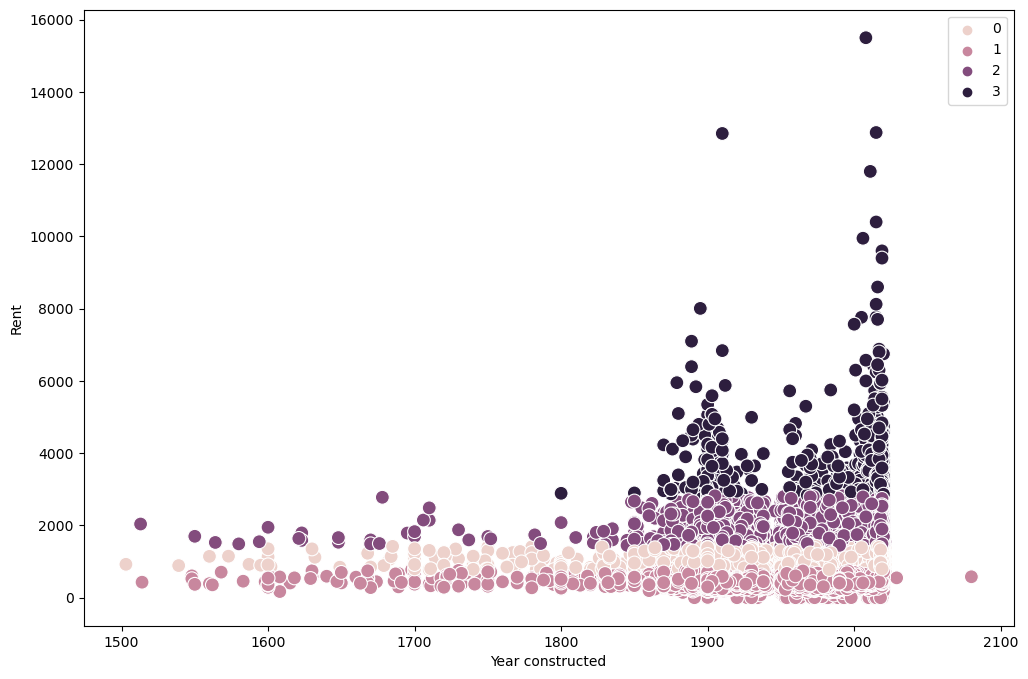

In [188]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['obj_yearConstructed'], y=df['obj_totalRent'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Year constructed') 
plt.ylabel('Rent') 
plt.show()

*Comment: it seems that cluster 0 and 1 are the less represented. Those are units built from the 1500 onwards, and with low rent prices.
The majority of the houses seem to be the ones grouped in cluster 3 and 2, meaning built from 1850 onwards,
and with a rent from 2 to 6k (plus some outliers in the higher range.)*

**Plotting the clusters for "obj_totalRent" and "obj_livingSpace"**

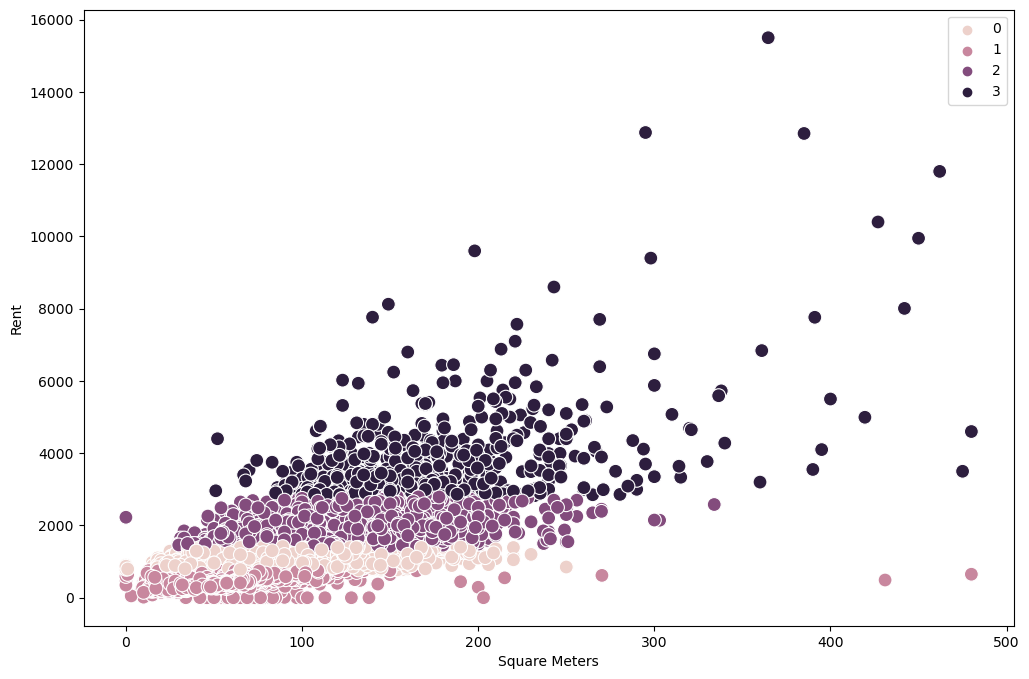

In [189]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['obj_livingSpace'], y=df['obj_totalRent'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Square Meters') 
plt.ylabel('Rent') 
plt.show()

*Comment: cluster 0 and 1 are the less represented, with less square meters and lower rents. 
Cluster 2 and 3 are the largest ones, with slightly more square meters but a noticeably higher rent price. Cluster 3 seems especially spread out (very high rent and lots of square meters)* 

**Plotting the clusters for "obj_totalRent" and "obj_noRooms"**

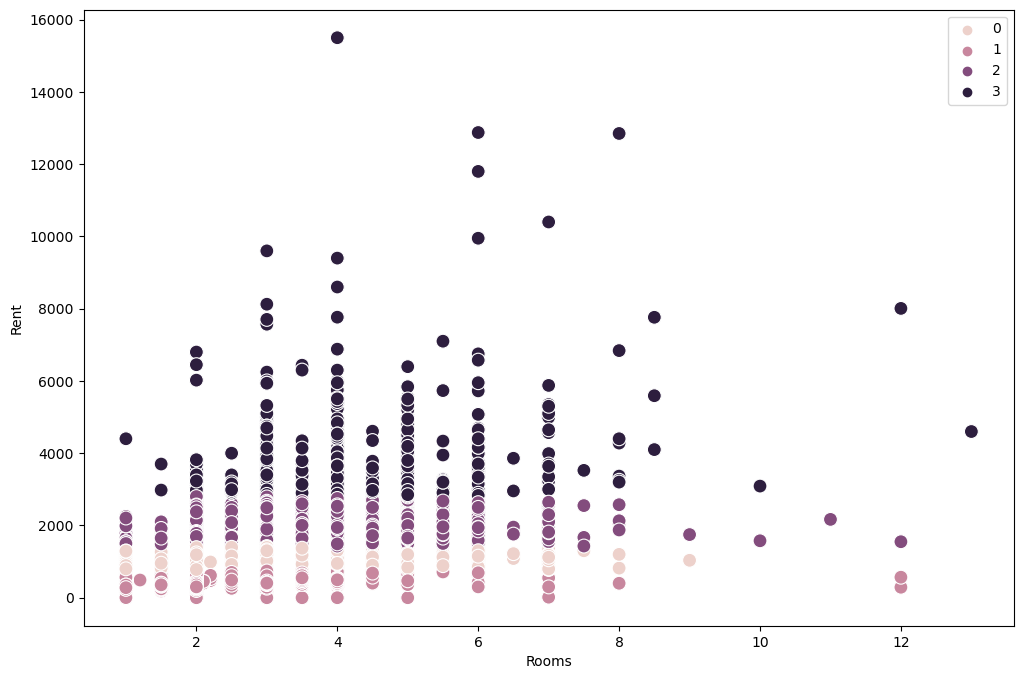

In [190]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['obj_noRooms'], y=df['obj_totalRent'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Rooms') 
plt.ylabel('Rent') 
plt.show()

*Comment: again cluster 0 and 1 are the less represented ones (they represent the lower rents).
Cluster 2 seems to be slightly larger, while the most represented of all is cluster 3.
Interestingly enough, there does not seem to be any large difference in the proportion between rooms and rent price.*

# Future pipeline: the above analysis is very interesting, but we have much more interesting non-categorical variables which we didn't take into account. Could be interesting to explore those as well. 